#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [63]:
# Read CSV
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [64]:
ada_duplikat = df.duplicated().any()
print(ada_duplikat)

df=df.drop_duplicates()

True


Periksa apakah ada missing values

In [65]:
missing_values = df.isna().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Periksa outlier dengan boxplot untuk setiap kolom feature

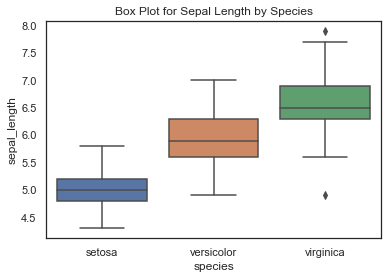

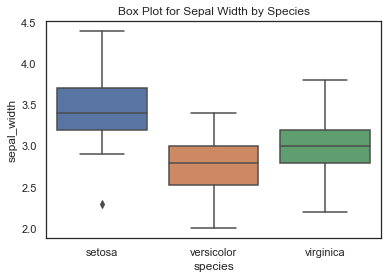

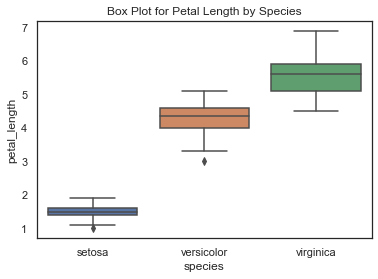

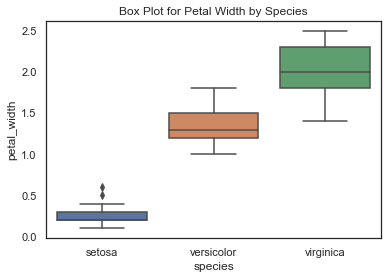

In [66]:
sns.boxplot(data=df, x="species", y="sepal_length")
plt.title("Box Plot for Sepal Length by Species")
plt.show()

sns.boxplot(data=df, x="species", y="sepal_width")
plt.title("Box Plot for Sepal Width by Species")
plt.show()

sns.boxplot(data=df, x="species", y="petal_length")
plt.title("Box Plot for Petal Length by Species")
plt.show()

sns.boxplot(data=df, x="species", y="petal_width")
plt.title("Box Plot for Petal Width by Species")
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [67]:
X = df.drop(columns=['species'])
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=0)

print(model)

LogisticRegression(random_state=0)


Uji model dengan dataset test

In [71]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[7 0 0]
 [0 4 0]
 [0 1 3]]

Accuracy: 0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [73]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [74]:
y_pred_NB = model_NB.predict(X_test)
print(y_pred_NB)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix_NB = confusion_matrix(y_test, y_pred)

accuracy_NB = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_NB)
print("\nAccuracy:", accuracy_NB)

Confusion Matrix:
[[7 0 0]
 [0 4 0]
 [0 1 3]]

Accuracy: 0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [76]:
model_knn = KNeighborsClassifier(metric='euclidean')
print(model_knn)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [77]:
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print(y_pred_knn)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


Ukur akurasi dari model K-Nearest Neighbor

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix_knn = confusion_matrix(y_test, y_pred)

accuracy_knn = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix_knn)
print("\nAccuracy:", accuracy_knn)

Confusion Matrix:
[[7 0 0]
 [0 4 0]
 [0 1 3]]

Accuracy: 0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [79]:
#Dari ketiga model klasifikasi yang dilakukan (Logistic Regression, Naive Bayes, K-Nearest Neighbor), semua menghasilkan tingkat
#akurasi yang sama
#Logistic Regression: 0.9333333333333333
#Naive Bayes: 0.9333333333333333
#K-Nearest Neighbor: 0.9333333333333333
    
#Maka dari itu, kinerja ketiganya sama baiknya dalam hal akurasi pada dataset Iris yang digunakan.